<a href="https://colab.research.google.com/github/labintsev/comp_vision_course/blob/main/CodeLab_1_CV_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision basic
### CodeLab 1

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img_bgr = cv2.imread('data/lena.png')
img_bgr.shape, type(img_bgr)

((512, 512, 3), numpy.ndarray)

In [8]:
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

(512, 512)


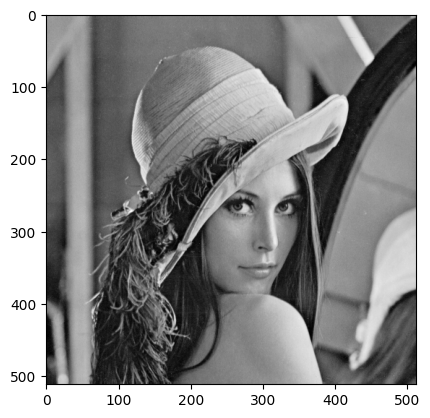

In [9]:
plt.imshow(gray_image, cmap='gray')

In [10]:
# Основные статистики изображения
gray_image.min(), gray_image.max(), gray_image.mean()

(np.uint8(25), np.uint8(245), np.float64(124.0485610961914))

(array([15330., 31337., 20358., 35131., 41844., 50760., 33320., 17552.,
        15860.,   652.]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <BarContainer object of 10 artists>)

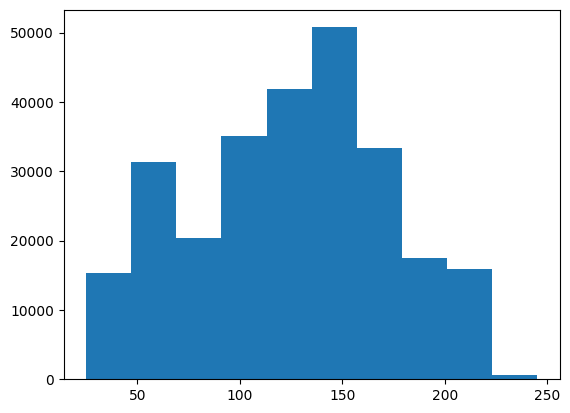

In [11]:
plt.hist(gray_image.ravel())

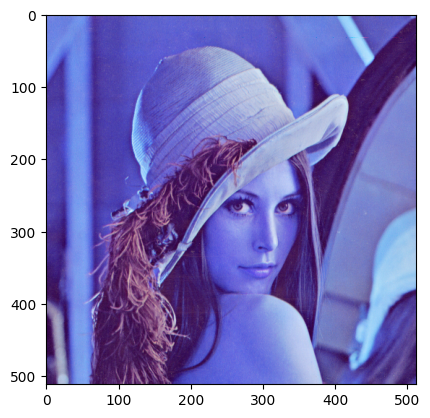

In [12]:
# https://stackoverflow.com/questions/14556545/why-opencv-using-bgr-colour-space-instead-of-rgb
plt.imshow(img_bgr)

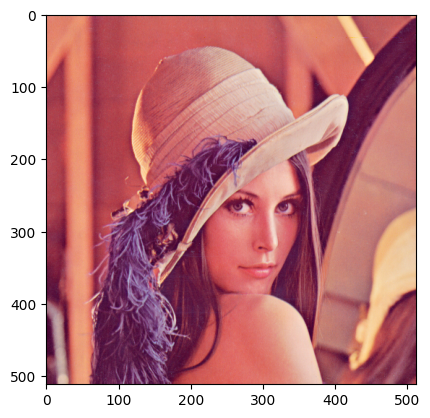

In [13]:
img = img_bgr[:, :, ::-1]

# or 
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img)

## Задание: Сохранение изображения в форматах PNG и JPEG

В этом задании вы научитесь:
- Загружать и сохранять изображения в разные форматы
- Сравнивать размеры файлов
- Анализировать влияние качества сжатия на размер и визуальное качество
- Понимать разницу между сжатием с потерями (JPEG) и без потерь (PNG)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Загружаем изображение
image_path = 'data/lena.png'
img = cv2.imread(image_path)

# Конвертируем из BGR в RGB для отображения
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Размер изображения: (512, 512, 3)
Тип данных: uint8
Диапазон значений пикселей: 3 - 255


### Шаг 1: Сохранение в формате PNG (без потерь)

In [16]:
# PNG - формат без потерь (lossless)
# PNG поддерживает разные уровни сжатия (0-9)

png_default = 'data/output_png_default.png'
png_best = 'data/output_png_best.png'

# Сохранение с параметрами по умолчанию
cv2.imwrite(png_default, img)

# Сохранение с максимальным сжатием
cv2.imwrite(png_best, img, [cv2.IMWRITE_PNG_COMPRESSION, 9])

# Информация о файлах PNG
png_default_size = os.path.getsize(png_default)
png_best_size = os.path.getsize(png_best)

print("=== PNG формат (без потерь) ===")
print(f"PNG (сжатие по умолчанию): {png_default_size / 1024:.2f} КБ")
print(f"PNG (максимальное сжатие): {png_best_size / 1024:.2f} КБ")
print(f"Разница: {(png_default_size - png_best_size) / 1024:.2f} КБ")

=== PNG формат (без потерь) ===
PNG (сжатие по умолчанию): 508.92 КБ
PNG (максимальное сжатие): 500.79 КБ
Разница: 8.12 КБ


### Шаг 2: Сохранение в формате JPEG (с потерями)

In [18]:
# JPEG - формат с потерями (lossy compression)
# Параметр качества: 0-100 (100 - максимальное качество)

jpeg_files = {}
jpeg_qualities = [95, 85, 75, 50, 25, 10]

print("\n=== JPEG формат (с потерями) ===")
for quality in jpeg_qualities:
    filename = f'data/output_jpeg_q{quality}.jpg'
    cv2.imwrite(filename, img, [cv2.IMWRITE_JPEG_QUALITY, quality])
    file_size = os.path.getsize(filename)
    jpeg_files[quality] = file_size
    print(f"JPEG (качество {quality}): {file_size / 1024:.2f} КБ")

# Оригинальный размер в памяти (примерный)
original_size = img.shape[0] * img.shape[1] * 3  # 3 канала (BGR)
print(f"\nОригинальный размер в памяти: {original_size / (1024**2):.2f} МБ")


=== JPEG формат (с потерями) ===
JPEG (качество 95): 104.96 КБ
JPEG (качество 85): 51.63 КБ
JPEG (качество 75): 36.90 КБ
JPEG (качество 50): 23.76 КБ
JPEG (качество 25): 15.44 КБ
JPEG (качество 10): 9.34 КБ

Оригинальный размер в памяти: 0.75 МБ


### Шаг 3: Сравнение размеров файлов

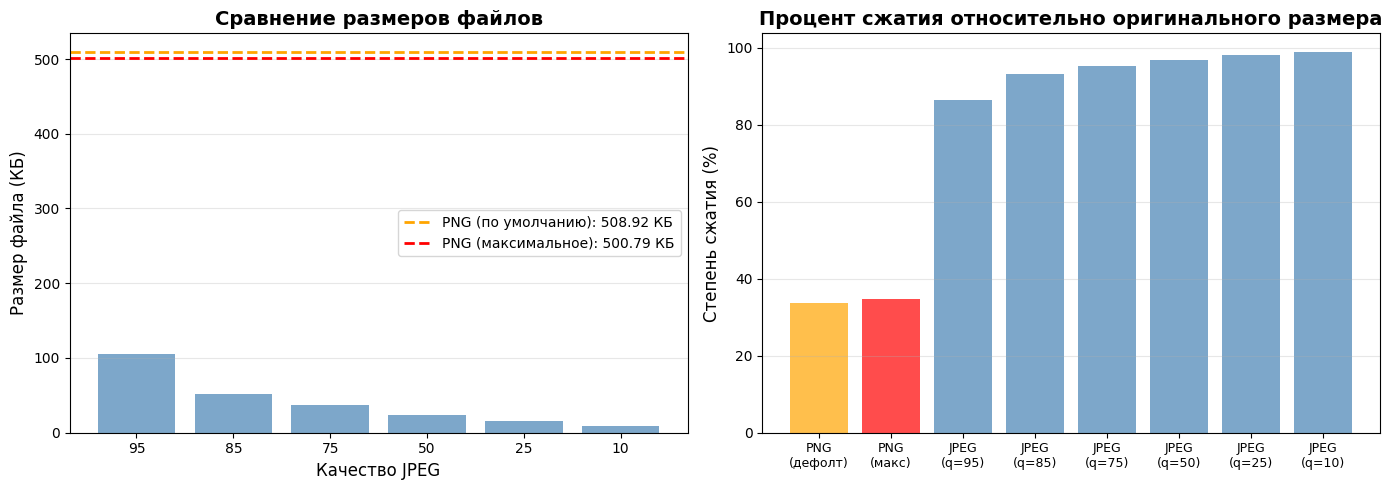


Оригинальный размер в памяти: 768.00 КБ
Сжатие PNG (по умолчанию): 33.7%
Сжатие PNG (максимальное): 34.8%

Сжатие JPEG:
  Качество 95: 86.3%
  Качество 85: 93.3%
  Качество 75: 95.2%
  Качество 50: 96.9%
  Качество 25: 98.0%
  Качество 10: 98.8%


In [19]:
# График сравнения размеров
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Размеры файлов
qualities = list(jpeg_files.keys())
sizes = [jpeg_files[q] / 1024 for q in qualities]

axes[0].bar(range(len(qualities)), sizes, color='steelblue', alpha=0.7)
axes[0].axhline(y=png_default_size / 1024, color='orange', linestyle='--', 
                label=f'PNG (по умолчанию): {png_default_size / 1024:.2f} КБ', linewidth=2)
axes[0].axhline(y=png_best_size / 1024, color='red', linestyle='--', 
                label=f'PNG (максимальное): {png_best_size / 1024:.2f} КБ', linewidth=2)
axes[0].set_xlabel('Качество JPEG', fontsize=12)
axes[0].set_ylabel('Размер файла (КБ)', fontsize=12)
axes[0].set_title('Сравнение размеров файлов', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(qualities)))
axes[0].set_xticklabels(qualities)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# График 2: Степень сжатия относительно оригинального размера
original_size_kb = original_size / 1024
compression_png_def = (1 - png_default_size / original_size) * 100
compression_png_best = (1 - png_best_size / original_size) * 100
compression_jpeg = [(1 - jpeg_files[q] / original_size) * 100 for q in qualities]

all_compressions = [compression_png_def] + [compression_png_best] + compression_jpeg
all_labels = ['PNG\n(дефолт)'] + ['PNG\n(макс)'] + [f'JPEG\n(q={q})' for q in qualities]

colors = ['orange', 'red'] + ['steelblue'] * len(jpeg_files)
axes[1].bar(range(len(all_compressions)), all_compressions, color=colors, alpha=0.7)
axes[1].set_ylabel('Степень сжатия (%)', fontsize=12)
axes[1].set_title('Процент сжатия относительно оригинального размера', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(all_compressions)))
axes[1].set_xticklabels(all_labels, rotation=0, fontsize=9)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nОригинальный размер в памяти: {original_size_kb:.2f} КБ")
print(f"Сжатие PNG (по умолчанию): {compression_png_def:.1f}%")
print(f"Сжатие PNG (максимальное): {compression_png_best:.1f}%")
print("\nСжатие JPEG:")
for quality, comp in zip(qualities, compression_jpeg):
    print(f"  Качество {quality}: {comp:.1f}%")

### Шаг 4: Сравнение визуального качества

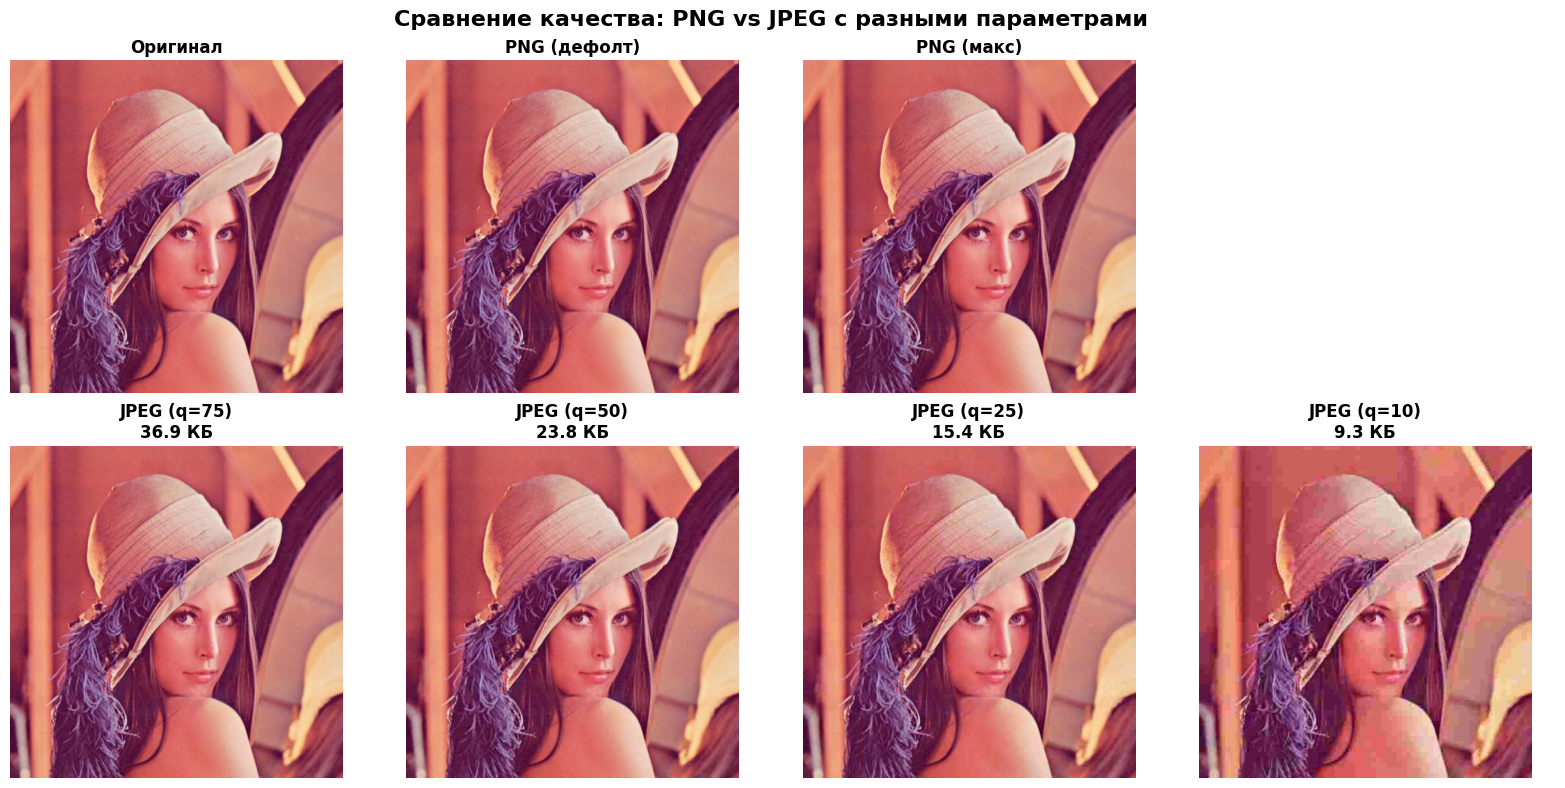

In [23]:
# Визуальное сравнение качества
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Сравнение качества: PNG vs JPEG с разными параметрами', fontsize=16, fontweight='bold')

# Оригинальное изображение
ax = axes[0, 0]
ax.imshow(img_rgb)
ax.set_title('Оригинал', fontweight='bold')
ax.axis('off')

# PNG с разными уровнями сжатия
for idx, (title, filename) in enumerate([('PNG (дефолт)', png_default), ('PNG (макс)', png_best)], 1):
    img_loaded = cv2.imread(filename)
    img_loaded_rgb = cv2.cvtColor(img_loaded, cv2.COLOR_BGR2RGB)
    ax = axes[0, idx]
    ax.imshow(img_loaded_rgb)
    ax.set_title(f'{title}', fontweight='bold')
    ax.axis('off')

# Пустой слот
axes[0, 3].axis('off')

# JPEG с разными качествами
for idx, quality in enumerate(jpeg_qualities[2:]):
    filename = f'data/output_jpeg_q{quality}.jpg'
    img_loaded = cv2.imread(filename)
    img_loaded_rgb = cv2.cvtColor(img_loaded, cv2.COLOR_BGR2RGB)
    ax = axes[1, idx]
    ax.imshow(img_loaded_rgb)
    file_size = os.path.getsize(filename)
    ax.set_title(f'JPEG (q={quality})\n{file_size / 1024:.1f} КБ', fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Шаг 5: Анализ различий (вычисление ошибки)

=== Анализ ошибок сжатия ===

PNG формат (без потерь):
  По умолчанию - MSE: 0.000000, PSNR: inf дБ
  Максимальное - MSE: 0.000000, PSNR: inf дБ

JPEG формат (с потерями):
  Качество 95 - MSE: 16.79, PSNR: 35.88 дБ
  Качество 85 - MSE: 25.33, PSNR: 34.09 дБ
  Качество 75 - MSE: 31.06, PSNR: 33.21 дБ
  Качество 50 - MSE: 40.87, PSNR: 32.02 дБ
  Качество 25 - MSE: 58.78, PSNR: 30.44 дБ
  Качество 10 - MSE: 114.85, PSNR: 27.53 дБ


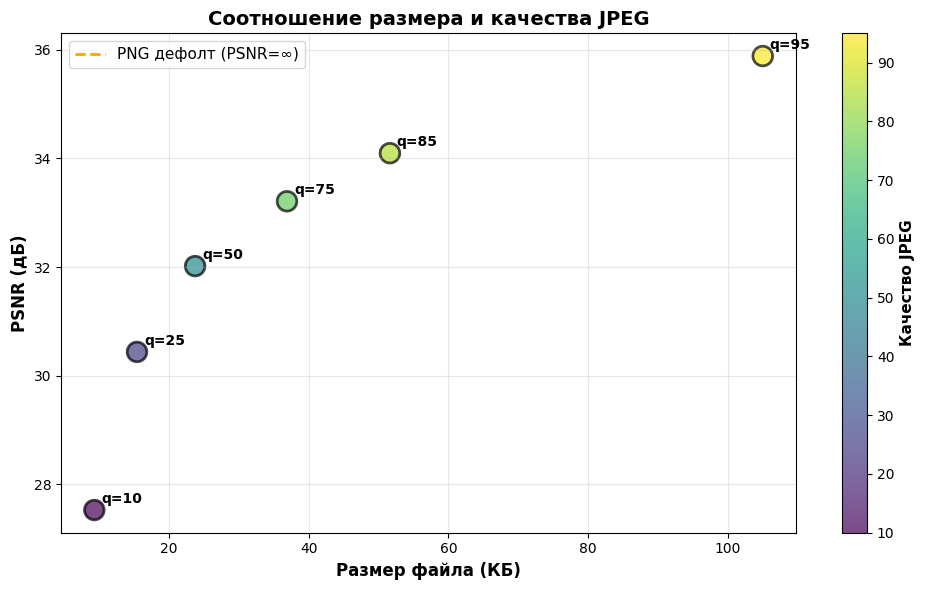

In [25]:
# Вычисляем метрики различия между оригиналом и сохраненными изображениями
def calculate_mse(img1, img2):
    """Mean Squared Error"""
    mse = np.mean((img1.astype(float) - img2.astype(float)) ** 2)
    return mse

def calculate_psnr(mse):
    """Peak Signal-to-Noise Ratio"""
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

print("=== Анализ ошибок сжатия ===\n")

# PNG
print("PNG формат (без потерь):")
png_def_img = cv2.imread(png_default)
png_best_img = cv2.imread(png_best)

mse_png_def = calculate_mse(img, png_def_img)
mse_png_best = calculate_mse(img, png_best_img)

print(f"  По умолчанию - MSE: {mse_png_def:.6f}, PSNR: {calculate_psnr(mse_png_def):.2f} дБ")
print(f"  Максимальное - MSE: {mse_png_best:.6f}, PSNR: {calculate_psnr(mse_png_best):.2f} дБ")

# JPEG
print("\nJPEG формат (с потерями):")
mse_values = {}
psnr_values = {}

for quality in jpeg_qualities:
    filename = f'data/output_jpeg_q{quality}.jpg'
    jpeg_img = cv2.imread(filename)
    mse = calculate_mse(img, jpeg_img)
    psnr = calculate_psnr(mse)
    mse_values[quality] = mse
    psnr_values[quality] = psnr
    print(f"  Качество {quality} - MSE: {mse:.2f}, PSNR: {psnr:.2f} дБ")

# График PSNR vs Размер файла
fig, ax = plt.subplots(figsize=(10, 6))

qualities_list = list(mse_values.keys())
psnr_list = [psnr_values[q] for q in qualities_list]
sizes_list = [jpeg_files[q] / 1024 for q in qualities_list]

scatter = ax.scatter(sizes_list, psnr_list, s=200, c=qualities_list, cmap='viridis', 
                     alpha=0.7, edgecolors='black', linewidth=2)
for quality, size, psnr in zip(qualities_list, sizes_list, psnr_list):
    ax.annotate(f'q={quality}', (size, psnr), xytext=(5, 5), 
                textcoords='offset points', fontsize=10, fontweight='bold')

ax.axhline(y=calculate_psnr(mse_png_def), color='orange', linestyle='--', 
           label=f'PNG дефолт (PSNR=∞)', linewidth=2)
ax.set_xlabel('Размер файла (КБ)', fontsize=12, fontweight='bold')
ax.set_ylabel('PSNR (дБ)', fontsize=12, fontweight='bold')
ax.set_title('Соотношение размера и качества JPEG', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Качество JPEG', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Практическое задание для самостоятельной работы

1. Загрузите изображение flag.jpg вместо lena.png и повторите анализ
2. Сравните размеры и качество для формата webp